In [1]:
import sympy as sm
import qutip as qt
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

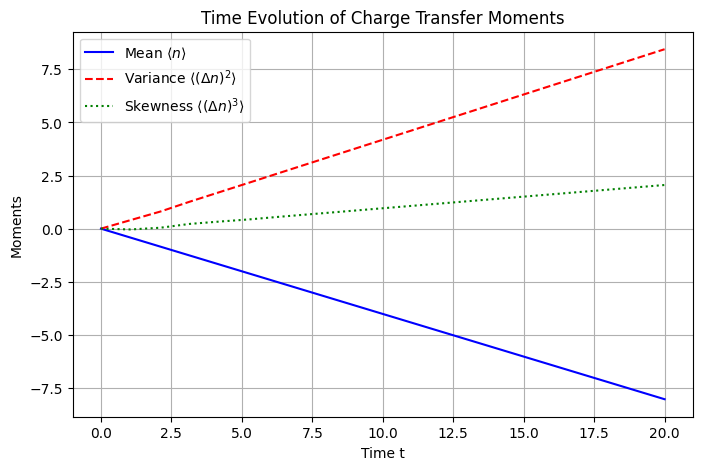

In [ ]:
# Define the Hamiltonian
def Ham(Δ, Ω):
    return Δ*0.5*qt.sigmaz() + Ω*qt.sigmax()

Δ = 0
Nb = 0.2
Ω, γt = 1, 1.0
H = Ham(Δ, Ω)
c_ops = [np.sqrt(γt*(Nb + 1))*qt.sigmam(), np.sqrt(γt*Nb)*qt.sigmap()]

# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

def tilted_liouvillian(H, L_list, chi, v_list):
    """
    Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

    Parameters:
    H : Qobj
        The Hamiltonian of the system.
    L_list : list of Qobj
        A list of jump operators.
    chi : float
        The tilt parameter.
    v_list : list of float
        A list of parameters that couple with chi, one for each jump operator.

    Returns:
    Qobj
        The tilted Liouvillian superoperator.
    """
    # Check that the number of jump operators matches the number of v values
    if len(L_list) != len(v_list):
        raise ValueError("The number of jump operators must match the number of v values.")

    # Hamiltonian part remains the same
    H_vec = qt.spre(H) - qt.spost(H)

    # Initialize the dissipative part
    L_vec_total = 0

    # Loop through all jump operators and their corresponding v values
    for L, v in zip(L_list, v_list):
        L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
        L_vec_total += L_vec

    # Combine Hamiltonian and dissipative parts
    return -1j * H_vec + L_vec_total

# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
v = [-1, 1]
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

# t = [5, 15, 30, 50]
t = np.linspace(0, 20, 20)

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(H, c_ops, i, v) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)

# Compute the cumulant generating function S(chi, t) = log P(chi, t)
S_chi_t = np.log(np.maximum(pchis, 1e-10))  # Avoid log(0) errors

# Compute moments by differentiation at each time step
dS_dchi = np.gradient(S_chi_t, 1j * chi, axis=1)  # First derivative -> Mean
d2S_dchi2 = np.gradient(dS_dchi, 1j * chi, axis=1)  # Second derivative -> Variance
d3S_dchi3 = np.gradient(d2S_dchi2, 1j * chi, axis=1)  # Third derivative -> Skewness

# Find index for chi = 0
chi_0_index = np.argmin(np.abs(chi))

# Extract time evolution of moments
mean_n_t = np.real(dS_dchi[:, chi_0_index])
variance_n_t = np.real(d2S_dchi2[:, chi_0_index])
skewness_n_t = np.real(d3S_dchi3[:, chi_0_index])

# Plot time evolution of moments
plt.figure(figsize=(8, 5))
plt.plot(t, mean_n_t, label=r"Mean $\langle n \rangle$", color="blue")
plt.plot(t, variance_n_t, label=r"Variance $\langle (\Delta n)^2 \rangle$", color="red", linestyle="dashed")
plt.plot(t, skewness_n_t, label=r"Skewness $\langle (\Delta n)^3 \rangle$", color="green", linestyle="dotted")
plt.xlabel("Time t")
plt.ylabel("Moments")
plt.legend()
plt.title("Time Evolution of Charge Transfer Moments")
plt.grid()
plt.show()

In [ ]:
# Define the Hamiltonian
def Ham(Δ, Ω):
    return Δ*0.5*qt.sigmaz() + Ω*qt.sigmax()

Δ = 0
Nb = 0.2
Ω, γt = 1, 1.0
H = Ham(Δ, Ω)
c_ops = [np.sqrt(γt*(Nb + 1))*qt.sigmam(), np.sqrt(γt*Nb)*qt.sigmap()]

# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

def tilted_liouvillian(H, L_list, chi, v_list):
    """
    Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

    Parameters:
    H : Qobj
        The Hamiltonian of the system.
    L_list : list of Qobj
        A list of jump operators.
    chi : float
        The tilt parameter.
    v_list : list of float
        A list of parameters that couple with chi, one for each jump operator.

    Returns:
    Qobj
        The tilted Liouvillian superoperator.
    """
    # Check that the number of jump operators matches the number of v values
    if len(L_list) != len(v_list):
        raise ValueError("The number of jump operators must match the number of v values.")

    # Hamiltonian part remains the same
    H_vec = qt.spre(H) - qt.spost(H)

    # Initialize the dissipative part
    L_vec_total = 0

    # Loop through all jump operators and their corresponding v values
    for L, v in zip(L_list, v_list):
        L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
        L_vec_total += L_vec

    # Combine Hamiltonian and dissipative parts
    return -1j * H_vec + L_vec_total

rhoss

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.42971888+0.j         0.        -0.20080321j]
 [0.        +0.20080321j 0.57028112+0.j        ]]

In [ ]:
# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
v = [-1, 1]
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

# t = [5, 15, 30, 50]
t = np.linspace(0, 2000, 2000)

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(H, c_ops, i, v) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)

In [ ]:
# Compute the cumulant generating function S(chi, t) = log P(chi, t)
S_chi_t = np.log(np.maximum(pchis, 1e-10))  # Avoid log(0) errors

# Compute moments by differentiation at each time step
dS_dchi = np.gradient(S_chi_t, 1j * chi, axis=1)  # First derivative -> Mean
d2S_dchi2 = np.gradient(dS_dchi, 1j * chi, axis=1)  # Second derivative -> Variance
d3S_dchi3 = np.gradient(d2S_dchi2, 1j * chi, axis=1)  # Third derivative -> Skewness

# Find index for chi = 0
chi_0_index = np.argmin(np.abs(chi))

# Extract time evolution of moments
mean_n_t = (dS_dchi[:, chi_0_index])
variance_n_t = (d2S_dchi2[:, chi_0_index])
skewness_n_t = (d3S_dchi3[:, chi_0_index])

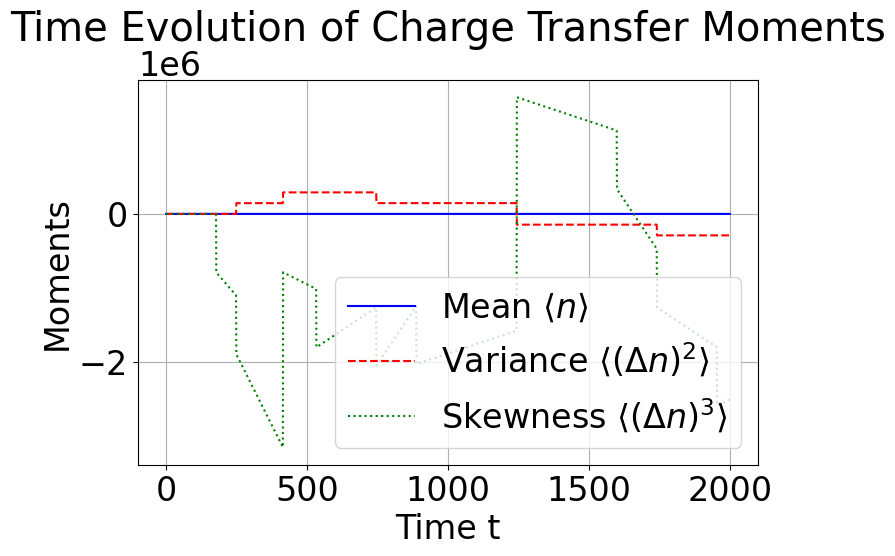

In [ ]:
# Plot time evolution of moments
plt.figure(figsize=(8, 5))
plt.plot(t, mean_n_t, label=r"Mean $\langle n \rangle$", color="blue")
plt.plot(t, variance_n_t, label=r"Variance $\langle (\Delta n)^2 \rangle$", color="red", linestyle="dashed")
plt.plot(t, skewness_n_t, label=r"Skewness $\langle (\Delta n)^3 \rangle$", color="green", linestyle="dotted")
plt.xlabel("Time t")
plt.ylabel("Moments")
plt.legend()
plt.title("Time Evolution of Charge Transfer Moments")
plt.grid()
plt.show()

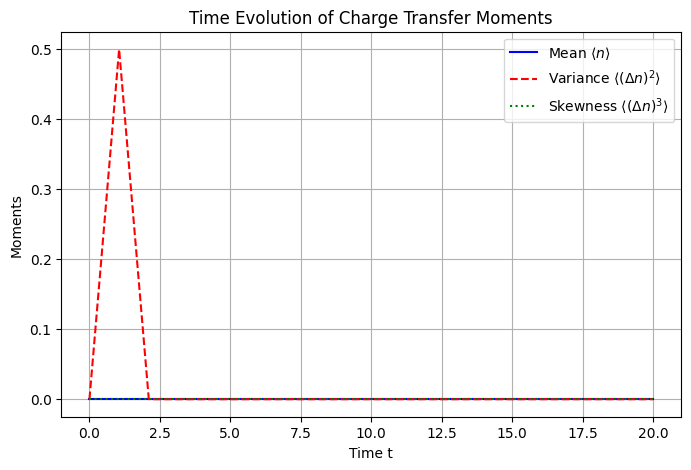

In [ ]:
# Define the Hamiltonian
def Ham(Δ, Ω):
    return Δ*0.5*qt.sigmaz() + Ω*qt.sigmax()

Δ = 1.0
Nb = 0.2
Ω, γt = 0, 1.0
H = Ham(Δ, Ω)
r, phi = 2, 2

R = np.cosh(r)*qt.sigmam() + np.exp(1j*phi)*np.sinh(r)*qt.sigmap()
c_ops = [np.sqrt(γt*(Nb + 1))*R, np.sqrt(γt*Nb)*R.dag()]

# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

def tilted_liouvillian(chi):
#     """
#     Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

#     Parameters:
#     H : Qobj
#         The Hamiltonian of the system.
#     L_list : list of Qobj
#         A list of jump operators.
#     chi : float
#         The tilt parameter.
#     v_list : list of float
#         A list of parameters that couple with chi, one for each jump operator.

#     Returns:
#     Qobj
#         The tilted Liouvillian superoperator.
# Check that the number of jump operators matches the number of v values
# if len(L_list) != len(v_list):
#     raise ValueError("The number of jump operators must match the number of v values.")
      Δ = 1.0
      Nb = 0.2
      Ω, γt = 0, 1.0
      H = Ham(Δ, Ω)
      r, phi = 2, 2

      R = np.cosh(r)*qt.sigmam() + np.exp(1j*phi)*np.sinh(r)*qt.sigmap()
      R1, R2 = [np.sqrt(γt*(Nb + 1))*R, np.sqrt(γt*Nb)*R.dag()]

      A = np.sqrt(γt*0.5*(Nb + 1))*np.cosh(r)
      B = np.sqrt(γt*0.5*(Nb + 1))*np.exp(1j*phi)*np.sinh(r)
      a = np.sqrt(γt*0.5*Nb)*np.cosh(r)
      b = np.sqrt(γt*0.5*Nb)*np.exp(1j*phi)*np.sinh(r)

      C1 = A*qt.sigmam()
      C2 = B*qt.sigmap()
      c1 = a*qt.sigmam()
      c2 = b*qt.sigmap()
      c1 = c1.dag()
      c2 = c2.dag()

      D1 = 2*(np.exp(-1j * chi) * qt.to_super(C1) + np.exp(1j * chi) * qt.to_super(C2) + qt.sprepost(C1, C2.dag()) + qt.sprepost(C2, C1.dag()))  - qt.spre(R1.dag() * R1) - qt.spost(R1.dag() * R1)
      D2 = 2*(np.exp(1j * chi) * qt.to_super(c1) + np.exp(-1j * chi) * qt.to_super(c2) + qt.sprepost(c1, c2.dag()) + qt.sprepost(c2, c1.dag()))  - qt.spre(R2.dag() * R2) - qt.spost(R2.dag() * R2)
      # Hamiltonian part remains the same
      H_vec = qt.spre(H) - qt.spost(H)

      # Initialize the dissipative part
      L_vec_total = D1 + D2

      # Combine Hamiltonian and dissipative parts
      return -1j * H_vec + L_vec_total

# # Loop through all jump operators and their corresponding v values
# for L, v in zip(L_list, v_list):
#     L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
#     L_vec_total += L_vec

# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
# v = [-1, 1]
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

# t = [5, 15, 30, 50]
t = np.linspace(0, 20, 20)

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(i) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)

# Compute the cumulant generating function S(chi, t) = log P(chi, t)
S_chi_t = np.log(np.maximum(pchis, 1e-10))  # Avoid log(0) errors

# Compute moments by differentiation at each time step
dS_dchi = np.gradient(S_chi_t, 1j * chi, axis=1)  # First derivative -> Mean
d2S_dchi2 = np.gradient(dS_dchi, 1j * chi, axis=1)  # Second derivative -> Variance
d3S_dchi3 = np.gradient(d2S_dchi2, 1j * chi, axis=1)  # Third derivative -> Skewness

# Find index for chi = 0
chi_0_index = np.argmin(np.abs(chi))

# Extract time evolution of moments
mean_n_t = np.real(dS_dchi[:, chi_0_index])
variance_n_t = np.real(d2S_dchi2[:, chi_0_index])
skewness_n_t = np.real(d3S_dchi3[:, chi_0_index])

# Plot time evolution of moments
plt.figure(figsize=(8, 5))
plt.plot(t, mean_n_t, label=r"Mean $\langle n \rangle$", color="blue")
plt.plot(t, variance_n_t, label=r"Variance $\langle (\Delta n)^2 \rangle$", color="red", linestyle="dashed")
plt.plot(t, skewness_n_t, label=r"Skewness $\langle (\Delta n)^3 \rangle$", color="green", linestyle="dotted")
plt.xlabel("Time t")
plt.ylabel("Moments")
plt.legend()
plt.title("Time Evolution of Charge Transfer Moments")
plt.grid()
plt.show()


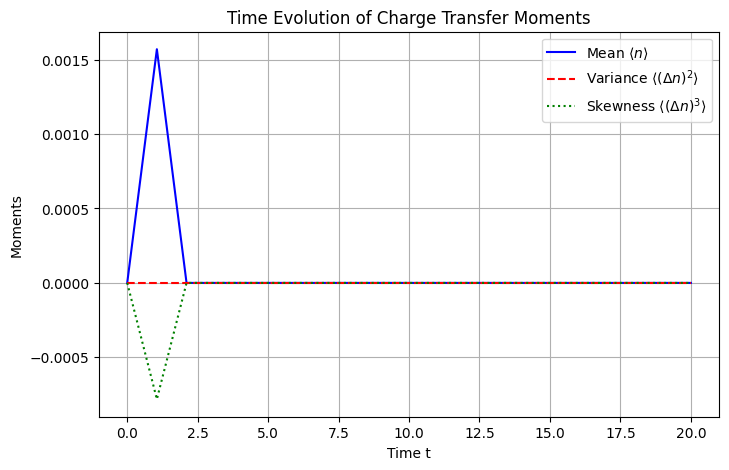

In [ ]:
# Extract time evolution of moments
mean_n_t = np.imag(dS_dchi[:, chi_0_index])
variance_n_t = np.imag(d2S_dchi2[:, chi_0_index])
skewness_n_t = np.imag(d3S_dchi3[:, chi_0_index])

# Plot time evolution of moments
plt.figure(figsize=(8, 5))
plt.plot(t, mean_n_t, label=r"Mean $\langle n \rangle$", color="blue")
plt.plot(t, variance_n_t, label=r"Variance $\langle (\Delta n)^2 \rangle$", color="red", linestyle="dashed")
plt.plot(t, skewness_n_t, label=r"Skewness $\langle (\Delta n)^3 \rangle$", color="green", linestyle="dotted")
plt.xlabel("Time t")
plt.ylabel("Moments")
plt.legend()
plt.title("Time Evolution of Charge Transfer Moments")
plt.grid()
plt.show()

In [ ]:
# Define the Hamiltonian
def Ham(Δ, Ω):
    return Δ*0.5*qt.sigmaz() + Ω*qt.sigmax()

Δ = 1.0
Nb = 0.2
Ω, γt = 0, 1.0
H = Ham(Δ, Ω)
r, phi = 2, 2

R = np.cosh(r)*qt.sigmam() + np.exp(1j*phi)*np.sinh(r)*qt.sigmap()
c_ops = [np.sqrt(γt*(Nb + 1))*R, np.sqrt(γt*Nb)*R.dag()]

# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

rhoss

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.48692179 0.        ]
 [0.         0.51307821]]

In [ ]:
def tilted_liouvillian(chi):
#     """
#     Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

#     Parameters:
#     H : Qobj
#         The Hamiltonian of the system.
#     L_list : list of Qobj
#         A list of jump operators.
#     chi : float
#         The tilt parameter.
#     v_list : list of float
#         A list of parameters that couple with chi, one for each jump operator.

#     Returns:
#     Qobj
#         The tilted Liouvillian superoperator.
# Check that the number of jump operators matches the number of v values
# if len(L_list) != len(v_list):
#     raise ValueError("The number of jump operators must match the number of v values.")
      Δ = 1.0
      Nb = 0.2
      Ω, γt = 0, 1.0
      H = Ham(Δ, Ω)
      r, phi = 2, 2

      R = np.cosh(r)*qt.sigmam() + np.exp(1j*phi)*np.sinh(r)*qt.sigmap()
      R1, R2 = [np.sqrt(γt*(Nb + 1))*R, np.sqrt(γt*Nb)*R.dag()]

      A = np.sqrt(γt*0.5*(Nb + 1))*np.cosh(r)
      B = np.sqrt(γt*0.5*(Nb + 1))*np.exp(1j*phi)*np.sinh(r)
      a = np.sqrt(γt*0.5*Nb)*np.cosh(r)
      b = np.sqrt(γt*0.5*Nb)*np.exp(1j*phi)*np.sinh(r)

      C1 = A*qt.sigmam()
      C2 = B*qt.sigmap()
      c1 = a*qt.sigmam()
      c2 = b*qt.sigmap()
      c1 = c1.dag()
      c2 = c2.dag()

      D1 = 2*(np.exp(-1j * chi) * qt.to_super(C1) + np.exp(1j * chi) * qt.to_super(C2) + qt.spre(C1)*qt.spost(C2.dag()) + qt.spre(C2)*qt.spost(C1.dag()))  - qt.spre(R1.dag() * R1) - qt.spost(R1.dag() * R1)
      D2 = 2*(np.exp(1j * chi) * qt.to_super(c1) + np.exp(-1j * chi) * qt.to_super(c2) + qt.spre(c1)*qt.spost(c2.dag()) + qt.spre(c2)*qt.spost(c1.dag()))  - qt.spre(R2.dag() * R2) - qt.spost(R2.dag() * R2)
      # Hamiltonian part remains the same
      H_vec = qt.spre(H) - qt.spost(H)

      # Initialize the dissipative part
      L_vec_total = D1 + D2

      # Combine Hamiltonian and dissipative parts
      return -1j * H_vec + L_vec_total

# # Loop through all jump operators and their corresponding v values
# for L, v in zip(L_list, v_list):
#     L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
#     L_vec_total += L_vec




In [ ]:
# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
# v = [-1, 1]
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

# t = [5, 15, 30, 50]
t = np.linspace(0, 2000, 2000)

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(i) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)

In [ ]:
# Compute the cumulant generating function S(chi, t) = log P(chi, t)
S_chi_t = np.log(np.maximum(pchis, 1e-10))  # Avoid log(0) errors

# Compute moments by differentiation at each time step
dS_dchi = np.gradient(S_chi_t, 1j * chi, axis=1)  # First derivative -> Mean
d2S_dchi2 = np.gradient(dS_dchi, 1j * chi, axis=1)  # Second derivative -> Variance
d3S_dchi3 = np.gradient(d2S_dchi2, 1j * chi, axis=1)  # Third derivative -> Skewness

# Find index for chi = 0
chi_0_index = np.argmin(np.abs(chi))

# Extract time evolution of moments
mean_n_t = np.real(dS_dchi[:, chi_0_index])
variance_n_t = np.real(d2S_dchi2[:, chi_0_index])
skewness_n_t = np.real(d3S_dchi3[:, chi_0_index])

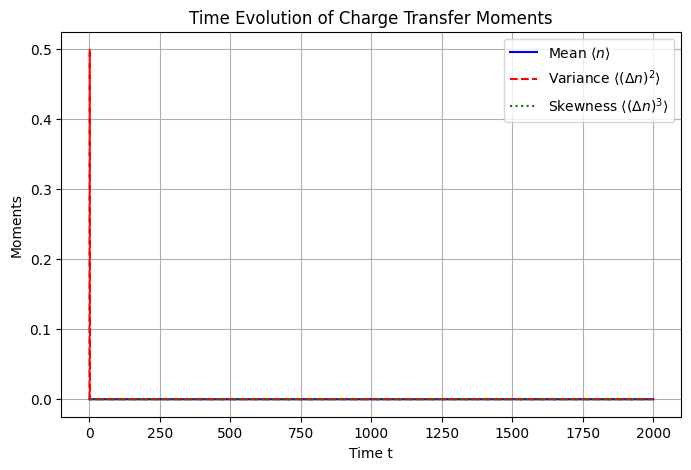

In [ ]:
# Plot time evolution of moments
plt.figure(figsize=(8, 5))
plt.plot(t, mean_n_t, label=r"Mean $\langle n \rangle$", color="blue")
plt.plot(t, variance_n_t, label=r"Variance $\langle (\Delta n)^2 \rangle$", color="red", linestyle="dashed")
plt.plot(t, skewness_n_t, label=r"Skewness $\langle (\Delta n)^3 \rangle$", color="green", linestyle="dotted")
plt.xlabel("Time t")
plt.ylabel("Moments")
plt.legend()
plt.title("Time Evolution of Charge Transfer Moments")
plt.grid()
plt.show()

In [ ]:
import sympy as sm
import qutip as qt
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid


# Define the Hamiltonian
def Ham(Δ, Ω):
    return Δ*0.5*qt.sigmaz() + Ω*qt.sigmax()

Δ = 1.0
Nb = 1.0
Ω, γt = 0, 1.0
H = Ham(Δ, Ω)
r, phi = 1.0, 1.0

R = np.cosh(r)*qt.sigmam() + np.exp(1j*phi)*np.sinh(r)*qt.sigmap()
c_ops = [np.sqrt(γt*(Nb + 1))*R, np.sqrt(γt*Nb)*R.dag()]

# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

def tilted_liouvillian(H, L_list, chi, v_list):
    """
    Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

    Parameters:
    H : Qobj
        The Hamiltonian of the system.
    L_list : list of Qobj
        A list of jump operators.
    chi : float
        The tilt parameter.
    v_list : list of float
        A list of parameters that couple with chi, one for each jump operator.

    Returns:
    Qobj
        The tilted Liouvillian superoperator.
    """
    # Check that the number of jump operators matches the number of v values
    if len(L_list) != len(v_list):
        raise ValueError("The number of jump operators must match the number of v values.")

    # Hamiltonian part remains the same
    H_vec = qt.spre(H) - qt.spost(H)

    # Initialize the dissipative part
    L_vec_total = 0

    # Loop through all jump operators and their corresponding v values
    for L, v in zip(L_list, v_list):
        L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
        L_vec_total += L_vec

    # Combine Hamiltonian and dissipative parts
    return -1j * H_vec + L_vec_total



# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
v = [-1, 1]
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

t = [5, 15, 30, 50]

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(H, c_ops, i, v) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)

In [4]:
def tilted_liouvillian(chi):
#     """
#     Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

#     Parameters:
#     H : Qobj
#         The Hamiltonian of the system.
#     L_list : list of Qobj
#         A list of jump operators.
#     chi : float
#         The tilt parameter.
#     v_list : list of float
#         A list of parameters that couple with chi, one for each jump operator.

#     Returns:
#     Qobj
#         The tilted Liouvillian superoperator.
# Check that the number of jump operators matches the number of v values
# if len(L_list) != len(v_list):
#     raise ValueError("The number of jump operators must match the number of v values.")
      Δ = 1.0
      Nb = 0
      Ω, γt = 0, 1.0
      H = Ham(Δ, Ω)
      r, phi = 1.0, 1.0

      R = np.cosh(r)*qt.sigmam() + np.exp(1j*phi)*np.sinh(r)*qt.sigmap()
      R1, R2 = [np.sqrt(γt*(Nb + 1))*R, np.sqrt(γt*Nb)*R.dag()]

      A = np.sqrt(γt*0.5*(Nb + 1))*np.cosh(r)
      B = np.sqrt(γt*0.5*(Nb + 1))*np.exp(1j*phi)*np.sinh(r)
      a = np.sqrt(γt*0.5*Nb)*np.cosh(r)
      b = np.sqrt(γt*0.5*Nb)*np.exp(1j*phi)*np.sinh(r)

      C1 = A*qt.sigmam()
      C2 = B*qt.sigmap()
      c1 = a*qt.sigmam()
      c2 = b*qt.sigmap()
      c1 = c1.dag()
      c2 = c2.dag()

      D1 = 2*(np.exp(-1j * chi) * qt.to_super(C1) + np.exp(1j * chi) * qt.to_super(C2) + qt.spre(C1)*qt.spost(C2.dag()) + qt.spre(C2)*qt.spost(C1.dag()))  - qt.spre(R1.dag() * R1) - qt.spost(R1.dag() * R1)
      D2 = 2*(np.exp(1j * chi) * qt.to_super(c1) + np.exp(-1j * chi) * qt.to_super(c2) + qt.spre(c1)*qt.spost(c2.dag()) + qt.spre(c2)*qt.spost(c1.dag()))  - qt.spre(R2.dag() * R2) - qt.spost(R2.dag() * R2)
      # Hamiltonian part remains the same
      H_vec = qt.spre(H) - qt.spost(H)

      # Initialize the dissipative part
      L_vec_total = D1 + D2

      # Combine Hamiltonian and dissipative parts
      return -1j * H_vec + L_vec_total

# # Loop through all jump operators and their corresponding v values
# for L, v in zip(L_list, v_list):
#     L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
#     L_vec_total += L_vec

# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)


# Create chi space
v = [-1, 1]
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

t = [5, 15, 30, 50]

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(i) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)


In [10]:
print("Shape of pchis:", pchis.shape)
print("Shape of chi:", chi.shape)

Shape of pchis: (4, 1000)
Shape of chi: (1000,)


In [17]:
#Compute n vals
nmax = 150
n = np.arange(-nmax-20, nmax+20 + 1)
# Peform Fourier transform
def prob(n):
    return np.abs([trapezoid(np.exp(-1j*ni*chi)*pchis, chi, dx=d_chi, axis=1) for ni in n])/(2*np.pi)

P = prob(np.arange(-nmax, nmax + 1))

while P[0, 1] + P[-1, 1] > 1e-13:
    P = np.vstack((
        prob(np.arange(-nmax - 10, -nmax)),
        P,
        prob(np.arange(nmax + 1, nmax + 11))
    ))
    nmax += 10

# Now fix n to match new P
n = np.arange(-nmax, nmax + 1)
P.T[0].shape == n.shape

True

In [ ]:
while P[0, 1] + P[-1, 1] > 1e-13:
        P = np.vstack((prob(np.arange(-nmax - 10, -nmax)), P, prob(np.arange(nmax + 1, nmax + 11))))
        nmax += 10
np.around(P, decimals=10)
P.T[0].shape

(161,)

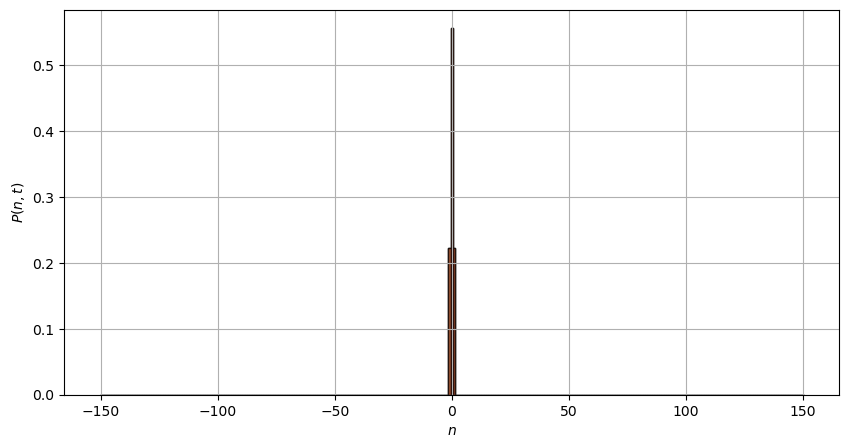

In [18]:
fig = plt.figure(figsize=(10, 5))

plt.bar(n, P.T[0], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, P.T[1], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, P.T[2], width = 1, alpha=0.5, edgecolor = 'k')
plt.bar(n, P.T[3], width = 1, alpha=0.5, edgecolor = 'k')

#plt.title('The FCS probability ' + r'$P(n, t)$,' + 'The negative count corresponds \nto the particle current flowing from cold to hot.')
# plt.xlim([-150, 10])
# plt.ylim([0, 0.15])
# plt.yticks(np.arange(0, 0.30, 0.05))
# plt.text(-5, 0.26, r'$\gamma t=5$')
# plt.text(-10, 0.17, r'$\gamma t=15$')
# plt.text(-15, 0.12, r'$\gamma t=20$')
# plt.text(-23, 0.09, r'$\gamma t=30$')
plt.grid()
plt.xlabel(r'$n$')
plt.ylabel(r'$P(n,t)$')
plt.show()

In [ ]:
# Define the Hamiltonian
def Ham(Δ, Ω):
    return Δ*0.5*qt.sigmaz() + Ω*qt.sigmax()

Δ = 1.0
Nb = 0.2
Ω, γt = 0, 1.0
H = Ham(Δ, Ω)
r, phi = 2, 2
R = np.cosh(r)*qt.sigmam() + np.exp(1j*phi)*np.sinh(r)*qt.sigmap()
c_ops = [np.sqrt(γt*(Nb + 1))*R, np.sqrt(γt*Nb)*R.dag()]

# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

def tilted_liouvillian(H, L_list, chi, v_list):
    """
    Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

    Parameters:
    H : Qobj
        The Hamiltonian of the system.
    L_list : list of Qobj
        A list of jump operators.
    chi : float
        The tilt parameter.
    v_list : list of float
        A list of parameters that couple with chi, one for each jump operator.

    Returns:
    Qobj
        The tilted Liouvillian superoperator.
    """
    # Check that the number of jump operators matches the number of v values
    if len(L_list) != len(v_list):
        raise ValueError("The number of jump operators must match the number of v values.")

    # Hamiltonian part remains the same
    H_vec = qt.spre(H) - qt.spost(H)

    # Initialize the dissipative part
    L_vec_total = 0

    # Loop through all jump operators and their corresponding v values
    for L, v in zip(L_list, v_list):
        L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
        L_vec_total += L_vec

    # Combine Hamiltonian and dissipative parts
    return -1j * H_vec + L_vec_total

rhoss

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.48692179 0.        ]
 [0.         0.51307821]]

In [ ]:
# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
v = [-1, 1]
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

# t = [5, 15, 30, 50]
t = np.linspace(0, 2000, 2000)

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(H, c_ops, i, v) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)

In [ ]:
# Compute the cumulant generating function S(chi, t) = log P(chi, t)
S_chi_t = np.log(np.maximum(pchis, 1e-10))  # Avoid log(0) errors

# Compute moments by differentiation at each time step
dS_dchi = np.gradient(S_chi_t, 1j * chi, axis=1)  # First derivative -> Mean
d2S_dchi2 = np.gradient(dS_dchi, 1j * chi, axis=1)  # Second derivative -> Variance
d3S_dchi3 = np.gradient(d2S_dchi2, 1j * chi, axis=1)  # Third derivative -> Skewness

# Find index for chi = 0
chi_0_index = np.argmin(np.abs(chi))

# Extract time evolution of moments
mean_n_t = np.real(dS_dchi[:, chi_0_index])
variance_n_t = np.real(d2S_dchi2[:, chi_0_index])
skewness_n_t = np.real(d3S_dchi3[:, chi_0_index])

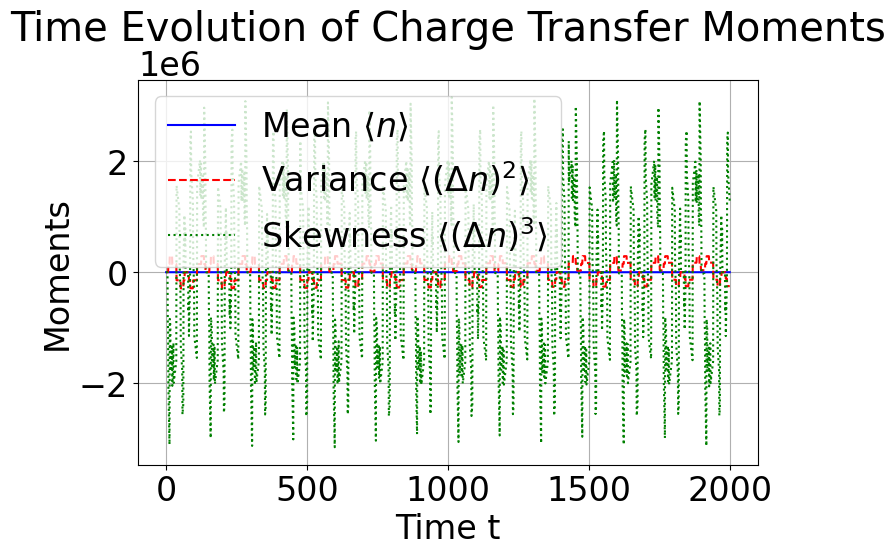

In [ ]:
# Plot time evolution of moments
plt.figure(figsize=(8, 5))
plt.plot(t, mean_n_t, label=r"Mean $\langle n \rangle$", color="blue")
plt.plot(t, variance_n_t, label=r"Variance $\langle (\Delta n)^2 \rangle$", color="red", linestyle="dashed")
plt.plot(t, skewness_n_t, label=r"Skewness $\langle (\Delta n)^3 \rangle$", color="green", linestyle="dotted")
plt.xlabel("Time t")
plt.ylabel("Moments")
plt.legend()
plt.title("Time Evolution of Charge Transfer Moments")
plt.grid()
plt.show()